In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style='darkgrid')

In [86]:
# data files
df_crashes = pd.read_csv('Crash_Data.csv', low_memory=False)
df=df_crashes
df_crashes.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [87]:
list(df.columns)

['Crash ID',
 'State',
 'Month',
 'Year',
 'Dayweek',
 'Time',
 'Crash Type',
 'Bus Involvement',
 'Heavy Rigid Truck Involvement',
 'Articulated Truck Involvement',
 'Speed Limit',
 'Road User',
 'Gender',
 'Age',
 'National Remoteness Areas',
 'SA4 Name 2016',
 'National LGA Name 2017',
 'National Road Type',
 'Christmas Period',
 'Easter Period',
 'Age Group',
 'Day of week',
 'Time of day']

In [78]:
list(df.State.unique())

['Vic', 'SA', 'Qld', 'WA', 'NSW', 'NT', 'ACT', 'Tas']

In [79]:
df.isnull().sum().any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Crash ID                52843 non-null  int64 
 1   State                   52843 non-null  object
 2   Month                   52843 non-null  int64 
 3   Year                    52843 non-null  int64 
 4   Dayweek                 52843 non-null  object
 5   Time                    52803 non-null  object
 6   Crash Type              52843 non-null  object
 7   Bus Involvement         52821 non-null  object
 8   Road User               52843 non-null  object
 9   Gender                  52816 non-null  object
 10  Age                     52843 non-null  int64 
 11  National LGA Name 2017  6893 non-null   object
 12  National Road Type      6877 non-null   object
 13  Christmas Period        52843 non-null  object
 14  Easter Period           52843 non-null  object
 15  Ag

In [83]:
df.drop(['National LGA Name 2017','Bus Involvement','National Road Type'],axis=1 ,inplace=True)
df_crashes.head()


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,Motorcycle rider,Male,38,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,Pedestrian,Female,28,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,Passenger,Male,19,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,Driver,Male,23,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,Motorcycle rider,Male,46,No,No,40_to_64,Weekend,Night


In [84]:
#State wise Crash percentage
# Labels for the sections of our pie chart
labels = ["Vic", "NSW", "SA", "QLD", "ACT", "NT", "WA", "Tas"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100, 120, 110, 200, 210]


colors = ["red", "orange", "lightcoral", "lightskyblue", "grey", "plum", "palegreen", "navy"]


explode = (0.1, 0, 0, 0, 0, 0, 0, 0)

Text(0.5, 1.0, 'Primary Contributing Cause of Reported Crashes (1989 - 2021)')

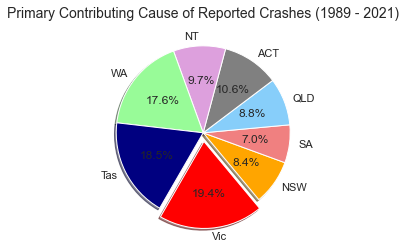

In [89]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title('Primary Contributing Cause of Reported Crashes (1989 - 2021)', fontsize=14)

In [68]:
#Creahs Type and Count
df_crashes.groupby('Crash Type')['Road User'].apply(lambda x: x.value_counts().head(1)).reset_index(name='COUNT').rename(columns={'level_1': 'Road User'})

,Crash Type,Road User,COUNT
0,Multiple,Driver,11404
1,Single,Driver,12412


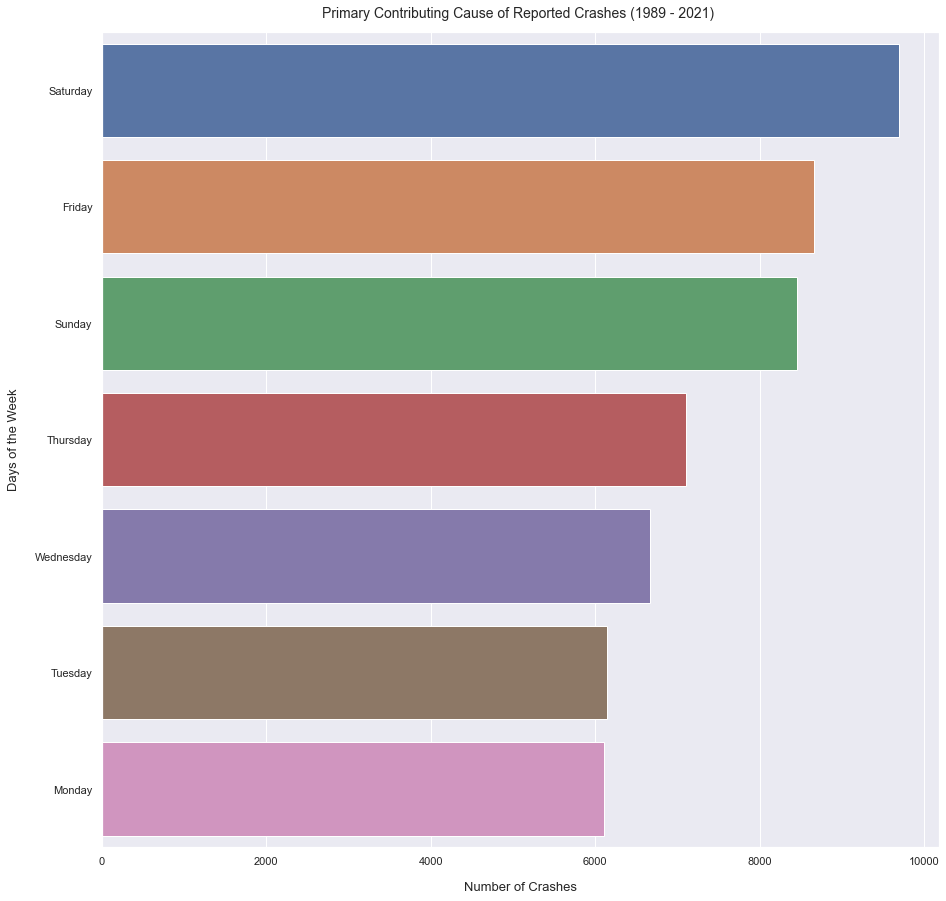

In [91]:
#Plot the reported crashes, from highest to lowest.
plt.figure(figsize=(15, 15))
sns.countplot(data=df_crashes,  y='Dayweek', order = df_crashes['Dayweek'].value_counts().index)
plt.title('Primary Contributing Cause of Reported Crashes (1989 - 2021) ', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=13, labelpad=15)
plt.ylabel('Days of the Week', fontsize=13, labelpad=15)
plt.savefig("Primary Contributing Cause.png", bbox_inches = "tight")
plt.show();

In [69]:
df_crashes.describe()

,Crash ID,Month,Year,Age
count,5.284300e+04,52843.000000,52843.000000,52843.000000
mean,2.003021e+07,6.568685,2002.729974,39.662377
std,9.383542e+04,3.457347,9.378570,21.806198
min,1.989100e+07,1.000000,1989.000000,-9.000000
25%,1.995111e+07,4.000000,1995.000000,22.000000
50%,2.002144e+07,7.000000,2002.000000,34.000000
75%,2.010408e+07,10.000000,2010.000000,55.000000
max,2.021801e+07,12.000000,2021.000000,101.000000


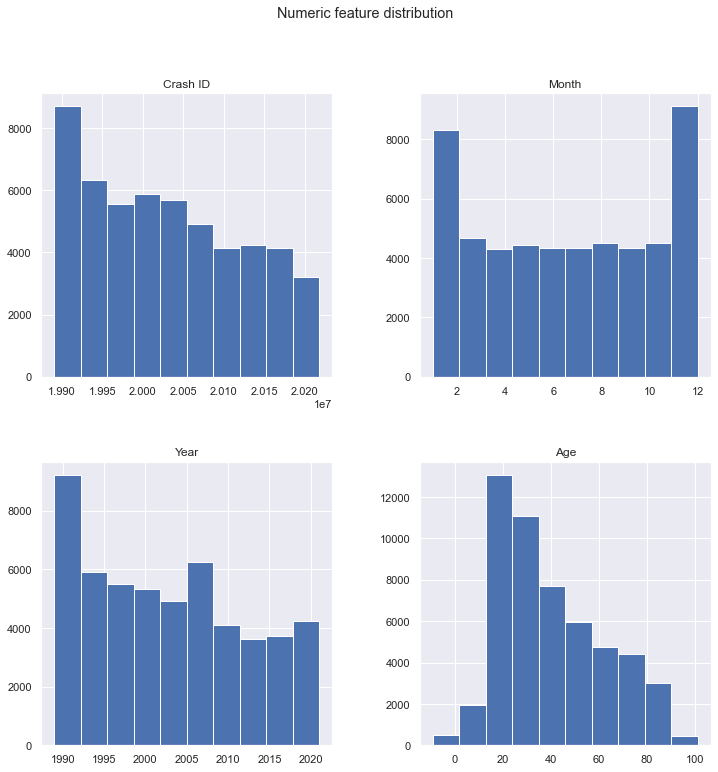

In [88]:
df_crashes.hist(figsize=[12,12])
plt.suptitle("Numeric feature distribution")
plt.savefig("Numeric feature distribution.png", bbox_inches = "tight")
plt.show()